In [1]:
!python -m pip install -U pip
!python -m pip install tqdm torch torchvision medmnist acsconv matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 8.4 MB/s eta 0:00:00
  Created wheel for acsconv: filename=ACSConv-0.1.1-py3-none-any.whl size=24202 sha256=1ecf2341841c11cb9158dc2444a112a8653f8064ed2965942e806d3d1d5b165f
  Stored in directory: /root/.cache/pip/wheels/5b/a9/27/b14493f91e9ce021741834e07218811b997a2d53959ca07e1e
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116949

In [2]:
# To access example workspaces and director/envoy scripts
!rm -rf openfl
!git clone -b miccai_fl_tutorial https://github.com/intel/openfl.git
!cd openfl && python -m pip install .

Cloning into 'openfl'...
remote: Enumerating objects: 7245, done.
remote: Counting objects: 100% (404/404), done.
remote: Compressing objects: 100% (271/271), done.
remote: Total 7245 (delta 210), reused 282 (delta 131), pack-reused 6841
Receiving objects: 100% (7245/7245), 122.60 MiB | 44.19 MiB/s, done.
Resolving deltas: 100% (4283/4283), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/openfl
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 101.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import os
import logging

# Better CPU Utilization
os.environ['OMP_NUM_THREADS'] = str(int(os.cpu_count() // 2))

# Logging fix for Google Colab
log = logging.getLogger()
log.setLevel(logging.INFO)

# Switch to the workspace directory
tutorial_dir = os.path.abspath(
    'openfl/openfl-tutorials/interactive_api/PyTorch_MedMNIST_3D')
os.chdir(tutorial_dir)

In [4]:
import numpy as np
from tqdm import tqdm
from pprint import pprint

import torch
import medmnist

print('PyTorch', torch.__version__)
print('MedMNIST', medmnist.__version__)

PyTorch 1.13.1+cu116
MedMNIST 2.1.0


In [5]:
# Train/test options
NUM_EPOCHS = 3
BATCH_SIZE = 16
DEVICE = 'cpu'

# Dataset
DATASET_NAME = 'synapsemnist3d'
DATASET_PATH = './data'
ds_info = medmnist.INFO[DATASET_NAME]
pprint(ds_info)

{'MD5': '1235b78a3cd6280881dd7850a78eadb6',
 'description': 'The SynapseMNIST3D is a new 3D volume dataset to classify '
                'whether a synapse is excitatory or inhibitory. It uses a 3D '
                'image volume of an adult rat acquired by a multi-beam '
                'scanning electron microscope. The original data is of the '
                'size 100×100×100um^3 and the resolution 8×8×30nm^3, where a '
                '(30um)^3 sub-volume was used in the MitoEM dataset with dense '
                '3D mitochondria instance segmentation labels. Three '
                'neuroscience experts segment a pyramidal neuron within the '
                'whole volume and proofread all the synapses on this neuron '
                'with excitatory/inhibitory labels. For each labeled synaptic '
                'location, we crop a 3D volume of 1024×1024×1024nm^3 and '
                'resize it into 28×28×28 voxels. Finally, the dataset is '
                'randomly split w

INFO:envoy.medmnist_shard_descriptor:Dataset synapsemnist3d.npz not found at:./data.
	Downloading...
INFO:envoy.medmnist_shard_descriptor:./data
synapsemnist3d.npz
{'python_class': 'SynapseMNIST3D', 'description': 'The SynapseMNIST3D is a new 3D volume dataset to classify whether a synapse is excitatory or inhibitory. It uses a 3D image volume of an adult rat acquired by a multi-beam scanning electron microscope. The original data is of the size 100×100×100um^3 and the resolution 8×8×30nm^3, where a (30um)^3 sub-volume was used in the MitoEM dataset with dense 3D mitochondria instance segmentation labels. Three neuroscience experts segment a pyramidal neuron within the whole volume and proofread all the synapses on this neuron with excitatory/inhibitory labels. For each labeled synaptic location, we crop a 3D volume of 1024×1024×1024nm^3 and resize it into 28×28×28 voxels. Finally, the dataset is randomly split with a ratio of 7:1:2 into training, validation and test set.', 'url': 'htt

  0%|          | 0/38034583 [00:00<?, ?it/s]

INFO:envoy.medmnist_shard_descriptor:DONE!
INFO:envoy.medmnist_shard_descriptor:MedMNIST data was loaded!
INFO:envoy.medmnist_shard_descriptor:MedMNIST data was loaded!


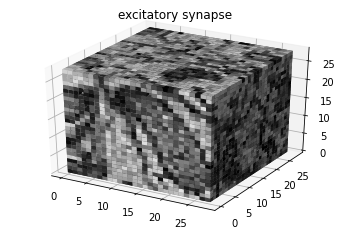

In [6]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms as T
from torch.utils.data import Dataset, DataLoader

from envoy.medmnist_shard_descriptor import MedMNISTShardDescriptor

# Download raw numpy dataset
sd = MedMNISTShardDescriptor(datapath=DATASET_PATH, dataname=DATASET_NAME)
(x_train, y_train), (x_test, y_test) = sd.load_data()

# Visualize a sample
sample_id = 42
label2str = list(ds_info['label'].values())
volume = x_train[sample_id]
label = label2str[np.squeeze(y_train[sample_id])]

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cmap = plt.get_cmap("gray")
norm = plt.Normalize(volume.min(), volume.max())
ax.voxels(volume, facecolors=cmap(norm(volume)))
plt.title(label)
plt.show()

In [7]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self, in_channels, num_classes):
        super(Net, self).__init__()

        self.layer1 = nn.Sequential(nn.Conv2d(in_channels, 16, kernel_size=3),
                                    nn.BatchNorm2d(16), nn.ReLU())

        self.layer2 = nn.Sequential(nn.Conv2d(16, 16, kernel_size=3),
                                    nn.BatchNorm2d(16), nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer3 = nn.Sequential(nn.Conv2d(16, 64, kernel_size=3),
                                    nn.BatchNorm2d(64), nn.ReLU())

        self.layer4 = nn.Sequential(nn.Conv2d(64, 64, kernel_size=3),
                                    nn.BatchNorm2d(64), nn.ReLU())

        self.layer5 = nn.Sequential(nn.Conv2d(64, 64, kernel_size=3, padding=1),
                                    nn.BatchNorm2d(64), nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2, stride=2))

        self.fc = nn.Sequential(nn.Linear(64 * 4 * 4 * 4, 128), 
                                nn.ReLU(),
                                nn.Dropout(0.5),
                                nn.Linear(128, num_classes))

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [8]:
import os
import time
import yaml
from typing import Dict, List, Union

Configure Director

In [9]:
# Should be the same as defined in `director_config.yaml`
director_node_fqdn = 'localhost'
director_port = 50051

director_workspace_path = os.path.join(tutorial_dir, 'director')
director_config_file = os.path.join(director_workspace_path,'director_config.yaml')
director_logfile = os.path.join(director_workspace_path, 'director.log')

# Start director
os.system(f'cd {director_workspace_path};'
          f'fx director start --disable-tls -c {director_config_file} '
          f'>{director_logfile} &')
!sleep 5 && tail -n5 $director_logfile

In [10]:
def generate_envoy_configs(
        config: dict,
        n_cols: int,
        datapath: str,
        dataname: str,
        save_path: str) -> list:
    
    config_paths = list()
    for i in range(1, n_cols+1):
        path = os.path.abspath(os.path.join(save_path, f'{i}_envoy_config.yaml'))
        config['shard_descriptor']['params']['datapath'] = datapath
        config['shard_descriptor']['params']['dataname'] = dataname    
        config['shard_descriptor']['params']['rank_worldsize'] = f'{i},{n_cols}'
        with open(path, 'w') as f:
            yaml.safe_dump(config, f)
        config_paths.append(path)
    return config_paths

In [11]:
# Read the original envoy config file content
original_config_path = os.path.join(tutorial_dir, 'envoy', 'envoy_config.yaml')
with open(original_config_path, 'r') as f:
    original_config = yaml.safe_load(f)

# Generate configs for as many envoys
config_paths = generate_envoy_configs(original_config,
                                      n_cols=2,
                                      datapath=DATASET_PATH,
                                      dataname=DATASET_NAME,
                                      save_path=os.path.dirname(original_config_path))
# Start envoys in a loop
cwd = os.getcwd()
for i, path in enumerate(config_paths):
    print(f'Starting Envoy {i+1}')
    os.chdir(os.path.dirname(path))

    # Wait until envoy loads dataset
    os.system(f'fx envoy start -n env_{i+1} --disable-tls '
                f'--envoy-config-path {path} -dh {director_node_fqdn} -dp {director_port} '
                f'>env_{i+1}.log 2>&1 &')
    !grep -q "MedMNIST data was loaded" <( tail -f env_{i+1}.log )
    
    os.chdir(cwd)

Starting Envoy 1
Starting Envoy 2


In [12]:
from openfl.interface.interactive_api.federation import Federation

# Create a federation
federation = Federation(client_id='frontend',
                        director_node_fqdn=director_node_fqdn,
                        director_port=director_port,
                        tls=False)

# Wait till all envoys publish their shard registry.
pprint(federation.get_shard_registry())

{'env_1': {'current_time': '2023-01-19 07:00:31',
           'experiment_name': 'ExperimentName Mock',
           'is_experiment_running': False,
           'is_online': True,
           'last_updated': '2023-01-19 07:00:25',
           'shard_info': node_info {
  name: "env_1"
}
shard_description: "MedMNIST dataset, shard number 1 out of 2"
sample_shape: "28"
sample_shape: "28"
sample_shape: "28"
target_shape: "1"
target_shape: "1"
,
           'valid_duration': seconds: 120
},
 'env_2': {'current_time': '2023-01-19 07:00:31',
           'experiment_name': 'ExperimentName Mock',
           'is_experiment_running': False,
           'is_online': True,
           'last_updated': '2023-01-19 07:00:30',
           'shard_info': node_info {
  name: "env_2"
}
shard_description: "MedMNIST dataset, shard number 2 out of 2"
sample_shape: "28"
sample_shape: "28"
sample_shape: "28"
target_shape: "1"
target_shape: "1"
,
           'valid_duration': seconds: 120
}}


In [13]:
from openfl.interface.interactive_api.experiment import DataInterface

# A fix to access the following module
os.chdir(os.path.join(tutorial_dir, 'workspace'))
from wspace_utils.utils import Transform3D

class TransformDataset(Dataset):
    """Applies transforms to each element of the Dataset"""

    def __init__(self, dataset, transform=None, target_transform=None):
        """Initializes Dataset"""
        self.dataset = dataset
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        """Returns length of the dataset"""
        return len(self.dataset)

    def __getitem__(self, index):
        """Returns img, label by index, with transforms if any"""
        img, label = self.dataset[index]
        img = np.stack([img/255.], axis=0)
        
        if self.target_transform:
            label = self.target_transform(label)
        
        if self.transform:
            img = self.transform(img)

        return img, label

# Transforms
shape_transform = False
train_transform = Transform3D(mul='random') if shape_transform else Transform3D()
eval_transform = Transform3D(mul='0.5') if shape_transform else Transform3D()

class MedMnistFedDataset(DataInterface):

    def __init__(self, **kwargs):
        self.kwargs = kwargs

    @property
    def shard_descriptor(self):
        return self._shard_descriptor

    @shard_descriptor.setter
    def shard_descriptor(self, shard_descriptor):
        """
        Describe per-collaborator procedures or sharding.

        This method will be called during a collaborator initialization.
        Local shard_descriptor  will be set by Envoy.
        """
        self._shard_descriptor = shard_descriptor

        self.train_set = TransformDataset(
            self._shard_descriptor.get_dataset('train'),
            transform=train_transform)

        self.valid_set = TransformDataset(
            self._shard_descriptor.get_dataset('val'),
            transform=eval_transform)

    def get_train_loader(self, **kwargs):
        """Output of this method will be provided to tasks with optimizer in contract"""
        return DataLoader(self.train_set,
                          num_workers=8,
                          batch_size=self.kwargs['train_bs'],
                          shuffle=True)

    def get_valid_loader(self, **kwargs):
        """Output of this method will be provided to tasks without optimizer in contract"""
        return DataLoader(self.valid_set,
                          num_workers=8,
                          batch_size=self.kwargs['valid_bs'])

    def get_train_data_size(self):
        """Information for aggregation"""
        return len(self.train_set)

    def get_valid_data_size(self):
        """Information for aggregation"""
        return len(self.valid_set)

In [14]:
fed_dataset = MedMnistFedDataset(train_bs=BATCH_SIZE, valid_bs=BATCH_SIZE)

In [15]:
from openfl.interface.interactive_api.experiment import ModelInterface

from acsconv.converters import Conv3dConverter
from wspace_utils.utils import model_to_syncbn

def get_3d_cnn():
  ## Fill: Instantiate a model
  model = Net(in_channels=ds_info['n_channels'], num_classes=len(ds_info['label'].values()))

  ## Fill: Convert model to 3D using Conv3dConverter
  model = Conv3dConverter(model, i3d_repeat_axis=None)

  ## Fill: Convert all BatchNorm layers to SyncBN layers
  model = model_to_syncbn(model)
  return model

model = get_3d_cnn()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)  ## Fill: Instantiate an `Adam` Optimizer
criterion = nn.CrossEntropyLoss()  ## Fill: Instantiate a CrossEntropyLoss function

framework_adapter = 'openfl.plugins.frameworks_adapters.pytorch_adapter.FrameworkAdapterPlugin'
MI = ModelInterface(model=model.model,
                    optimizer=optimizer,
                    framework_plugin=framework_adapter)

The ``converters`` are currently experimental. It may not support operations including (but not limited to) Functions in ``torch.nn.functional`` that involved data dimension


In [16]:
from openfl.interface.interactive_api.experiment import TaskInterface

# Task interface currently supports only standalone functions.
TI = TaskInterface()
extra_args = {'criterion': criterion}

# Train task
@TI.add_kwargs(**extra_args)
@TI.register_fl_task(model='model', data_loader='data_loader', device='device', optimizer='optimizer')
def train(model: nn.Module, 
          data_loader: torch.utils.data.DataLoader,
          device: str,
          optimizer: torch.optim.Optimizer, 
          criterion: nn.Module) -> dict:
    """Trains `model` for 1 epoch on `train_loader`

    Args:
        model (nn.Module): PyTorch Model.
        dataloader (torch.utils.data.DataLoader): Training Dataloader.
        optimizer (torch.optim.Optimizer): Optimizer instance.
        criterion (nn.Module): Loss function instance.

    Returns:
        dict: `acc` and `loss` metrics over the dataloader
    """
    ## Set the model to training mode
    model.train()

    ## Initialize counters for accuracy/loss
    losses = []
    correct = 0
    total = 0

    ## Create a `for` loop that iterates over the dataloader
    for x, y in tqdm(data_loader, desc='training'):
        ## Push `x` and `y` tensors to the device
        x = x.to(device)
        y = torch.squeeze(y).long().to(device)
        
        ## Clear optimizer gradients
        optimizer.zero_grad()
        
        ## Forward pass `x` through the model to get `preds`
        preds = model(x)
        
        ## Calculate `loss` using the criterion
        loss = criterion(preds, y)

        ## Backpropagate `loss` to compute gradients
        loss.backward()
        
        ## Apply gradients with step
        optimizer.step()
        
        ## Record metrics
        losses.append(loss.item())
        correct += torch.sum(preds.max(1)[1] == y).item()
        total += y.size(0)

    #############################################################
    return {
        'train_acc': np.round(correct/total, 3),
        'train_loss': np.round(np.mean(losses), 3),
    }

@TI.add_kwargs(**extra_args)
@TI.register_fl_task(model='model', data_loader='data_loader', device='device')
def validate(model: nn.Module, 
             data_loader: torch.utils.data.DataLoader,
             device: str,
             criterion: nn.Module) -> dict:
    """Computes `acc` and `loss` of the `model` on `val_loader`

    Args:
        model (nn.Module): PyTorch Model.
        data_loader (torch.utils.data.DataLoader): Validation Dataloader.
        device (str): 'cpu' or 'cuda'
        criterion (nn.Module): Loss function instance.

    Returns:
        dict: `acc` and `loss` metrics over the dataloader
    """
    ## Set the model to evaluation mode
    model.eval()

    ## Initialize counters for accuracy/loss
    losses = []
    correct = 0
    total = 0

    ## Define a scope that disables gradient calculation
    with torch.no_grad():
        ## Create a `for` loop that iterates over the dataloader
        for x, y in tqdm(data_loader, desc='validating'):
            ## Push `x` and `y` tensors to the device
            x = x.to(device)
            y = torch.squeeze(y).long().to(device)
            
            ## Forward pass `x` through the model to get `preds`
            preds = model(x)
            
            ## Calculate `loss` using the criterion
            loss = criterion(preds, y)
            
            ## Record metrics
            losses.append(loss.item())
            correct += torch.sum(preds.max(1)[1] == y).item()
            total += y.size(0)

    #############################################################

    return {
        'val_acc': np.round(correct/total, 3),
        'val_loss': np.round(np.mean(losses), 3),
    }

In [17]:
from openfl.interface.interactive_api.experiment import FLExperiment

fl_experiment = FLExperiment(federation=federation, experiment_name='synapsemnist3d_experiment')
fl_experiment.start(model_provider=MI,
                    task_keeper=TI,
                    data_loader=fed_dataset,
                    rounds_to_train=3,
                    device_assignment_policy='CUDA_PREFERRED')

# This method streams logs from the director, and also saves logs in the tensorboard format (by default)
fl_experiment.stream_metrics()

INFO:openfl.federated.plan.plan:Building [red]🡆[/] Object [red]CloudpickleSerializer[/] from [red]openfl.plugins.interface_serializer.cloudpickle_serializer[/] Module.
INFO:openfl.federated.plan.plan:Building [red]🡆[/] Object [red]FrameworkAdapterPlugin[/] from [red]openfl.plugins.frameworks_adapters.pytorch_adapter[/] Module.
INFO:openfl.interface.interactive_api.experiment:Starting experiment!
INFO:openfl.federated.plan.plan:FL-Plan hash is [blue]27591f501077d830429fb98552ec6e23b921f54c2ad47f6b81f718025dfb4918c2961ef1ee31bd9d84c9d5d256c962f0[/]
INFO:openfl.federated.plan.plan:FL-Plan hash is [blue]27591f501077d830429fb98552ec6e23b921f54c2ad47f6b81f718025dfb4918c2961ef1ee31bd9d84c9d5d256c962f0[/]
INFO:openfl.federated.plan.plan:Building [red]🡆[/] Object [red]CoreTaskRunner[/] from [red]openfl.federated.task.task_runner[/] Module.
INFO:openfl.federated.plan.plan:Building [red]🡆[/] Object [red]FrameworkAdapterPlugin[/] from [red]openfl.plugins.frameworks_adapters.pytorch_adapter[/] Modu

In [18]:
# To stop all services run
!pkill fx
[os.remove(path) for path in config_paths]

[None, None]